## REPASO OPTIMIZACIÓN

### 1 - Programación Lineal

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

#### Ejemplo

z(x) = 5.0 * x1 + 4.0 * x2

RESTRICCIONES:
* 6x1 + 4x2 <= 24
* x1 + 2x2 <= 6
* x1 + x2 <= 1
* x2 <= 2

In [2]:
fc = 'z(x) = 5.0 * x1 + 4.0 * x2'
r = '6x1 + 4x2 <= 24\nx1 + 2x2 <= 6\nx1 + x2 <= 1\nx2 <= 2'

In [3]:
# Dado que linprog está creado para minimizar y en este caso queremos maximizar, 
# debemos especificar los parámetros de la función coste en negativo

c = np.array([-5.0,-4.0]) # Funcion objetivo
A = np.array([[6,4],[1,2],[-1,1],[0,1]]) # Funcion restricciones libres menor que
b = np.array([24,6,1,2]) # coeficientes libres

In [4]:
res = linprog(c,A,b, method='revised simplex')
print(res)

     con: array([], dtype=float64)
     fun: -21.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0. , 0. , 2.5, 0.5])
  status: 0
 success: True
       x: array([3. , 1.5])


In [5]:
x1,x2 = res.x.T
print(x1,x2)
# Parámetros óptimos

3.0 1.4999999999999998


In [6]:
print('La solución es {} con los parámetros x1 y x2 = {}'.format(np.dot(res.x.T , -c),(x1,x2)))

La solución es 21.0 con los parámetros x1 y x2 = (3.0, 1.4999999999999998)


**Interpretación**

A continuación podremos visualizar la respuesta del modelo

In [7]:
def plot_constr(c,A,b,limites,zz):
    """Author Stephen Krol 2020 <stephendata.science.blog>"""
    N = A.shape[0]
    print("Number of contraints inequalities: ", N)
    plt.figure(figsize=(15,7))
    plt.title("Cost:  z = "+ " + ".join([str(x)+" x"+str(i+1) for i,x in enumerate(c)]))
    X = np.linspace(0,15)
    for i in range(0,N):
        c_txt = " + ".join([str(x)+" x"+str(i+1) for i,x in enumerate(A[i,:])]) + " <= " + str(b[i])
        plt.plot(X, -X*(A[i,0]/A[i,1]) + b[i]/A[i,1] ,label = c_txt ) 
 
    for j in range(zz[0],zz[1], zz[2]):
        c_txt = "z = " + str(j)
        plt.plot(X, -X*(c[0]/c[1]) + (j/c[1]), "--" ,label = c_txt ) 
         
    res = linprog(c, A, b, method="revised simplex")
    plt.plot(res.x[0],res.x[1],"ro", label="Solucion")
     
    plt.xlim(0,limites[0])
    plt.ylim(0,limites[1])
    plt.legend()
    plt.grid()
    plt.show()

Number of contraints inequalities:  4


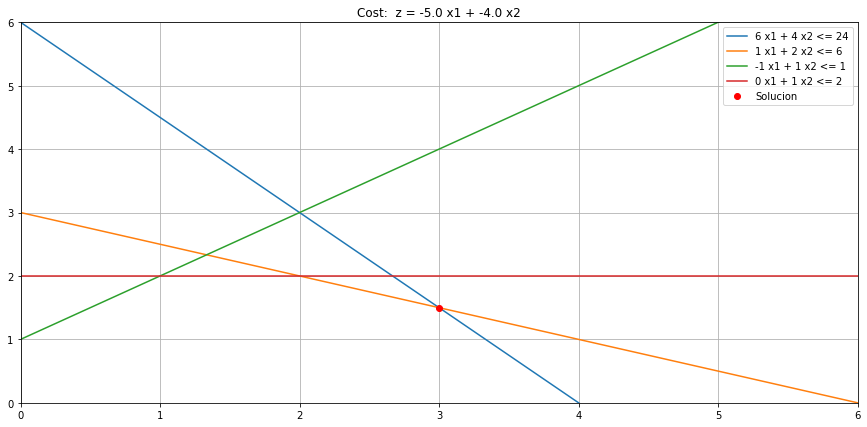

In [8]:
plot_constr(c,A,b,[6,6],[int(np.dot(res.x.T,-c)),0,5])

#### Caso 1

Un inversor que tiene un presupuesto de 10.000€ está considerando 2 alternativas de inversión para el próximo año. La alternativa A
tiene un retorno de un 10% anual y la alternativa B un retorno de un 15% anual.

La desviación estándar de los retornos anuales (como indicador del riesgo de la inversión) según información histórica para la
alternativa A y B han sido un 3% y 6%, respectivamente.

El inversor desea que su inversión total considere una desviación estándar máxima de un 5%. Asimismo ha establecido que al menos
desea invertir 2.000€ en la alternativa A.
¿Cuál es la estrategia de inversión para maximizar los retornos de la inversión conjunta?

z(x) = 0.1 * x1 + 0.15 * x2

RESTRICCIONES

* r1: x1+x2 <= 10000
* r2: x1 >= 2000
* r3: x1>0, x2>0
* r4: (0.03x+0.06x2/(x+y))<= 0.05       => **-0.02x1 + 0.01x2 <= 0**

In [9]:
c = np.array([-0.1,-0.15]) # Funcion objetivo
A = np.array([[1,1],[-0.02,0.01]])
b= np.array([10000,0])

In [10]:
res = linprog(c,A,b,bounds=[(0,10000),(2000,10000)],method='revised simplex')
print(res)

     con: array([], dtype=float64)
     fun: -1333.3333333333333
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.00000000e+00, -1.42108547e-14])
  status: 0
 success: True
       x: array([3333.33333333, 6666.66666667])


In [11]:
opt = np.dot(res.x.T , -c)
x1,x2 = res.x.T
(opt,x1,x2)

(1333.3333333333333, 3333.333333333333, 6666.666666666667)

Number of contraints inequalities:  2


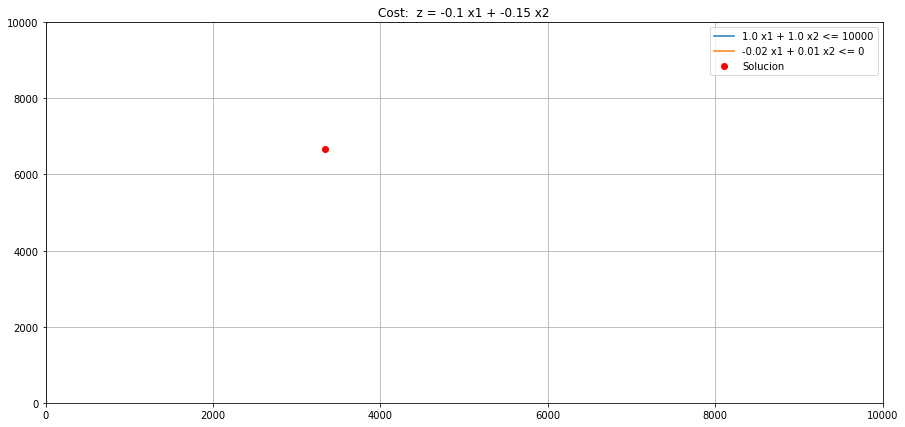

In [12]:
plot_constr(c,A,b,[10000,10000],[int(np.dot(res.x.T,-c)),0,1000])

**Caso 2**

Una fábrica de motos fabrica dos modelos de scooters (Ride y Nevada).

El modelo Ride tiene un margen de contribución de 150 €/ud
El modelo Nevada tiene un margen de contribución de 160 €/ud

El proceso de fabricación se descompone en 3 partes (Cuadro, Ruedas/Ensamblaje y Calidad/Packaging) con diferentes requerimientos
de recursos en horas por unidad (ver cuadro 1)
Por otro lado la capacidad disponible en (horas/semana) de cada uno de los procesos está limitada.
Se trata de planificar la producción de la próxima semana teniendo en cuenta que se quiere maximizar el beneficio


z(x) = 150 * x1 + 160 * x2

RESTRICCIONES

* r1: 4.0x1 + 5.0x2 <= 5610
* r2: 1.5x1 + 2.0x2 <= 2200
* r3: 1.0x1 + 0.8x2 <=1200
* r4: x1,x2 = INT
* r5: x1,x2 >=0

Este modelo requiere que se devuelvan valores ENTEROS (no se pueden fabricar 1.5 motos), así que no podemos utilizar scipy linprog. Debemos aplicar PULP o Pyomo.

In [13]:
import pulp as pulp

In [14]:
# use the LpProblem function to initialize a statement of our linear optimization problem 
linearProblem = pulp.LpProblem("Motos\n",pulp.LpMaximize) # we maximize, and thus use LpMaximize as parameter

# using the PuLP module optimization variables have to be declared with the LpVariable function
x1 = pulp.LpVariable("x1",lowBound = 0,cat="Integer") # x1 has only lower bound, no upper bound
x2 = pulp.LpVariable("x2",lowBound = 0, cat="Integer") # x2 has only lower bound, no upper bound

linearProblem += 150*x1 + 160*x2
linearProblem += 4*x1 + 5*x2 <= 5610
linearProblem += 1.5*x1 + 2*x2 <= 2200
linearProblem += 1*x1 + 0.8*x2 <= 1200

In [15]:
linearProblem

Motos
:
MAXIMIZE
150*x1 + 160*x2 + 0
SUBJECT TO
_C1: 4 x1 + 5 x2 <= 5610

_C2: 1.5 x1 + 2 x2 <= 2200

_C3: x1 + 0.8 x2 <= 1200

VARIABLES
0 <= x1 Integer
0 <= x2 Integer

In [16]:
# solve the problem, using the standard PuLP solver for continuous linear optimization problems
solution = linearProblem.solve()

# see if optimization run was successful, using LpStatus from the PuLP module
pulp.LpStatus[solution]

'Optimal'

In [17]:
print('Beneficio Óptimo: ',pulp.value(linearProblem.objective))
print('Fabricando {} uds de Ride y {} uds de Nevada'.format(pulp.value(x1),pulp.value(x2)))

Beneficio Óptimo:  198000.0
Fabricando 840.0 uds de Ride y 450.0 uds de Nevada


#### Caso 3

Reciclados Antonio es una compañía dedicada a la producción de fertilizantes. Desde hace algunos años emplea reutiliza materias primas
que vienen de residuos de otras empresas para producir sus abonos y fertilizantes. En los últimos meses dispone en sus almacenes de 5
materias primas distintas: MP1, MP2, MP3, MP4, MP5
.
. Estas materias primas se combinan de mantera diferente para conseguir distintos
productos. En particular, con las materias primas de las que se dispone en el almacén en ese momento determinado se pueden fabricar
sólo 3 productos: P1, P2 y P3.
Cada uno de los productos se puede vender a un precio distinto y la demanda para los precios es diferente para cada uno de los productos

El objetivo es maximizar el beneficio

f = 𝑷𝟏 − 𝑪𝟏 ∗ 𝑸𝟏 + 𝑷𝟐 − 𝑪𝟐 ∗ 𝑸𝟐 + 𝒑𝟑 − 𝑪𝟑 ∗ 𝑸3

In [18]:
df = pd.read_excel('A3-20220304-Reciclados Antonio.xlsx',header=14+1)[:5].set_index('Unnamed: 1')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Stock disponible (Tn),Coste unitarios (€/tn),P1,P2,P3
Unnamed: 1,,,,,
MP1,2000.0,80,1.8,2,3
MP2,9000.0,3,0,50,3
MP3,2000.0,25,1.5,1,5
MP4,1200.0,19,1,0,2
MP5,3500.0,30,8,1,2


In [19]:
c1 = []
c2= []
c3 = []

p1=525
p2=420
p3=600

for i in range(df.shape[0]):
    c1.append(df.iloc[i]['P1']*df.iloc[i]['Coste unitarios (€/tn)'])
    c2.append(df.iloc[i]['P2']*df.iloc[i]['Coste unitarios (€/tn)'])
    c3.append(df.iloc[i]['P3']*df.iloc[i]['Coste unitarios (€/tn)'])
    
c1 = sum(c1)
c2 = sum(c2)
c3 = sum(c3)
c1,c2,c3

(440.5, 365, 472)

In [20]:
# use the LpProblem function to initialize a statement of our linear optimization problem 
linearProblem = pulp.LpProblem("Reciclados_Antonio\n",pulp.LpMaximize) # we maximize, and thus use LpMaximize as parameter

# using the PuLP module optimization variables have to be declared with the LpVariable function
q1 = pulp.LpVariable("q1",lowBound = 0,upBound= 300,cat="Integer") # x1 has only lower bound, upbound is determined by its demand at x price
q2 = pulp.LpVariable("q2",lowBound = 0,upBound =600, cat="Integer")
q3 = pulp.LpVariable("q3",lowBound = 0,upBound =180, cat="Integer")

linearProblem += (p1-c1)*q1 + (p2-c2)*q2 + (p3-c3)*q3
for i in range(df.shape[0]):
    linearProblem += df.iloc[i]['P1']*q1 + df.iloc[i]['P2']*q2 + df.iloc[i]['P3']*q3 <= df.iloc[i]['Stock disponible (Tn)']

In [21]:
linearProblem

Reciclados_Antonio
:
MAXIMIZE
84.5*q1 + 55*q2 + 128*q3 + 0.0
SUBJECT TO
_C1: 1.8 q1 + 2 q2 + 3 q3 <= 2000

_C2: 50 q2 + 3 q3 <= 9000

_C3: 1.5 q1 + q2 + 5 q3 <= 2000

_C4: q1 + 2 q3 <= 1200

_C5: 8 q1 + q2 + 2 q3 <= 3500

VARIABLES
0 <= q1 <= 300 Integer
0 <= q2 <= 600 Integer
0 <= q3 <= 180 Integer

In [22]:
# solve the problem, using the standard PuLP solver for continuous linear optimization problems
solution = linearProblem.solve()

# see if optimization run was successful, using LpStatus from the PuLP module
pulp.LpStatus[solution]

'Optimal'

In [23]:
print('Beneficio Óptimo: ',pulp.value(linearProblem.objective))
print('Fabricando {} uds de p1, {} uds de p2 y {} uds de p3'.format(pulp.value(q1),pulp.value(q2),pulp.value(q3)))

Beneficio Óptimo:  57685.0
Fabricando 300.0 uds de p1, 169.0 uds de p2 y 180.0 uds de p3


#### Caso 4

DISTRIFERT es un fabricante y operador logístico de fertilizantes
complejos en la península ibérica con 3 almacenes en Sevilla,
Madrid y Barcelona.

Su cliente es un distribuidor regional con CDs en Zaragoza, Valencia
y Almería
Los almacenes tienen en disposición de ser entregados el próximo
mes 65 Tn (15 Mad, 20 Bcn , 30 Sev)

Cada CD debe de recibir al menos una cantidad de Tn que satisfaga
la demanda esperada para el próximo mes (10 Val, 13 Zar, 20 Alm)
Los costes unitarios de transporte (€/Tn) figuran en la siguiente
tabla)

DISTRIFERT necesita determinar la cantidad a transportar desde
cada Almacén a los CDS de tal modo que se iguale la oferta (salidas)
y se satisfaga la demanda mínima de los CDs. Todo ello al mínimo
coste de transporte posible


In [24]:
b = pd.read_excel('A4-20220304-LP Distrifert.xlsx',header=15).drop('Unnamed: 0',axis=1)[:3].iloc[:,:4]
b

,Desde\Hasta,Valencia,Zaragoza,Almería
0,Madrid,60,65,75
1,Barcelona,55,62,98
2,Sevilla,75,95,55


In [25]:
c = pd.read_excel('A4-20220304-LP Distrifert.xlsx',header=19).drop('Unnamed: 0',axis=1)[:3].iloc[:,:4]
c.columns = b.columns
c

,Desde\Hasta,Valencia,Zaragoza,Almería
0,Madrid,2,13.0,0.0
1,Barcelona,20,0.0,0.0
2,Sevilla,0,0.0,30.0


In [26]:
linearProblem = pulp.LpProblem("Distrifert\n",pulp.LpMinimize)
tmv = pulp.LpVariable("tmv",lowBound = 0,cat="Integer")
tmz = pulp.LpVariable("tmz",lowBound = 0, cat="Integer")
tma = pulp.LpVariable("tma",lowBound = 0, cat="Integer")
tbv = pulp.LpVariable("tbv",lowBound = 0, cat="Integer")
tbz = pulp.LpVariable("tbz",lowBound = 0, cat="Integer")
tba = pulp.LpVariable("tba",lowBound = 0, cat="Integer")
tsv = pulp.LpVariable("tsv",lowBound = 0, cat="Integer")
tsz = pulp.LpVariable("tsz",lowBound = 0, cat="Integer")
tsa = pulp.LpVariable("tsa",lowBound = 0, cat="Integer")

linearProblem += (tmv*b.iloc[0,1] + tmz*b.iloc[0,2] + tma*b.iloc[0,3]) + (tbv*b.iloc[1,1] + tbz*b.iloc[1,2] + tba*b.iloc[1,3]) + (tsv*b.iloc[2,1] + tsz*b.iloc[2,2] + tsa*b.iloc[2,3])
linearProblem += tmv + tmz + tma == c.iloc[0,1:].sum()
linearProblem += tbv + tbz + tba == c.iloc[1,1:].sum()
linearProblem += tsv + tsz + tsa == c.iloc[2,1:].sum()
linearProblem += tmv + tbv + tsv >= c.iloc[:,1].sum()
linearProblem += tmz + tbz + tsz >= c.iloc[:,2].sum()
linearProblem += tma + tba + tsa >= c.iloc[:,3].sum()

In [28]:
# solve the problem, using the standard PuLP solver for continuous linear optimization problems
solution = linearProblem.solve()

# see if optimization run was successful, using LpStatus from the PuLP module
pulp.LpStatus[solution]

'Optimal'

In [63]:
print(linearProblem.objective)
for i in linearProblem.variables():
    print(i, ': {}'.format(pulp.value(i)))
print('Coste optimo: ',pulp.value(linearProblem.objective))

98*tba + 55*tbv + 62*tbz + 75*tma + 60*tmv + 65*tmz + 55*tsa + 75*tsv + 95*tsz
tba : 0
tbv : 20
tbz : 0
tma : 0
tmv : 2
tmz : 13
tsa : 30
tsv : 0
tsz : 0
Coste optimo:  3715


#### Caso 5: Resolviendo ejercicio de programación no lineal con python — Investigación de operaciones  // Simpy

In [64]:
from sympy import *

In [67]:
x,y = symbols("x y") #definimos los simbolos a utilizar
z = sympify("9.6*x - 0.06*x**2+10*y")
res = sympify("3*x**2 + 2*y**2 - 13950") #restriccion

px = solve(res.subs(y, 0))
py = solve(res.subs(x, 0))

In [68]:
px

[-5*sqrt(186), 5*sqrt(186)]

In [69]:
py

[-15*sqrt(31), 15*sqrt(31)]

In [70]:
y1= solve(z, y)[0]
y1

0.006*x*(x - 160.0)

In [72]:
dy1 = diff(y1, x)
dy2 = idiff(res, y, x) 

In [74]:
igual = Eq(dy1, dy2)

In [75]:
yigual = solve(igual, y)[0]

In [76]:
res2 = res.subs(y, yigual)

In [78]:
xs=solve(res2, x)
ySolution = res.subs(x, xs)
ySolution = solve(ySolution, y)

In [79]:
zSolution = z.subs(x, xs).subs(y, ySolution)
zSolution

-0.06*x**2 + 9.6*x + 10*y